## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Download the Data

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

HEART_DATA_PATH = "/Users/deanpierrot/Desktop/heart_ml/heart.csv"

heart_data = pd.read_csv(HEART_DATA_PATH, delimiter=',')

heart_data.shape

(1025, 14)

## Create a Test Set

In [5]:


train_set, test_set = train_test_split(heart_data, test_size=0.2, random_state=42)

In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Exploring each attribute and its characteristics

In [7]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Columns

1. age
2. sex (1 = male; 0 = female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

#### Chest pain type
1. Value 1: typical angina - 0
2. Value 2: atypical angina - 1
3. Value 3: non-anginal pain - 2
4. Value 4: asymptomatic - 3

#### What's a normal level for resting blood pressure?
- less than 120/80 mmHg.

#### What is serum cholestoral?
- It respresents the amount of total cholesterol in a person bloood.

#### What is the normal serum cholesterol levels?
- less than 200mg/dL(5.17mmol/L) is normal.
- 200 to 239 mg/dL(5.17 to 6.18mmol/L is borderline high.
- 240 mg/dL(6.21mmol/L) or greater is high.

#### Fasting blood sugar > 120mg/dL  0 = normal, 1 = not normal
- The measurement of your blood sugar after an overnight fast.
- 99mg/dL or lower -> normal = 0
- 100 to 125mg/dL -> prediabetes = 1
- 126 mg/dL or higher -> diabetes = 1

#### What is resting electrocardiographic results ( values 0, 1, 2 )?
- It provides information about your heart rate and rhythm, and can also show if there is enlargement of the heart, or evidence of a previous heart attack.

#### What's the meaning of the values 0, 1, 2?
- Value 0 = normal.
- Value 1 = having ST-T wave abnormality(T wave inversions and/or ST elevation or drepression of 0.05mV).
- Value 2 = showing probable of definite left ventricular hypertrophy by Estes' critera.

#### ST-T wave abnormality?
- Is known to independently predict subsequent morbidity and mortality from cardiovascular disease.

#### T-wave inversions?
- is defined as negative T-wave of ≥1 mm in depth in two or more contiguous leads, with exclusion of leads aVR, lll, V1.

#### What is Estes' criteria? - [my-ekg.org](https://en.my-ekg.com/calculation-ekg/romhilt-estes-score.php)
- The Romhilt-Estes point score system was one of the early efforts to improve the ability of the electrocardiogram to detect left ventricular hypertrophy (LVH).


#### ST elevation v.s. ST depression - [ieeexplore.ieee.org](https://ieeexplore.ieee.org/document/5761212)
- ST depression has a major role in detecting of ischemia. Ischemia is a condition in which blood flow(and oxygen) is restricted or reduced in a part of the body.
- ST elevation is associated to special cases of ischemia or situation after myocardial infarction(which is another word for heart attack).

#### What does ST elevation mean for the heart? - [fraserhealth.ca](https://www.fraserhealth.ca/health-topics-a-to-z/heart-health/heart-surgery-and-procedures/non-surgical-heart-procedures/stemi#.ZBRMx-zMJhE)
- A heart attack with a completely blocked coronary artery is called a STEMI. STEMI stands for ST Elevation Myocardial Infarction.

#### What does ST depression on ECG( electrocardiographic ) indicates? - [ncbi.nlm.nih.gov](https://pubmed.ncbi.nlm.nih.gov/11741361/#:~:text=Coronary%20artery%20disease-,ST%20depression%20in%20ECG%20at%20entry%20indicates%20severe%20coronary%20lesions,the%20FRISC%20II%20ECG%20substudy.)
- Servere coronary lesions and large benefits of an early invasive treatment strategy in unstable coronary artery disease.

#### How do you measure the maximum heart rate? - [cdc.gov](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm#:~:text=You%20can%20estimate%20your%20maximum,beats%20per%20minute%20(bpm)).
- Subtract your age from 220. 
- Ex: 200 - 50(age) = 170 beats per min(bpm)

#### What is exercise induced angina? ( 1 = yes, 0 = no ) - [Harvard University](https://www.health.harvard.edu/heart-health/angina-symptoms-diagnosis-and-treatments#:~:text=September%2021%2C%202021,by%20cholesterol%2Dclogged%20coronary%20arteries.)
- Angina is pain in the chest that comes on with exercise, stress, or other things that make the heart work harder.

#### What is ST depression induced by exercise relative to rest? - [ncbi.nlm.nih.gov](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1768611/#:~:text=Exercise%20induced%20ST%20segment%20depression,diagnosis%20of%20obstructive%20coronary%20atherosclerosis.&text=It%20has%20also%20been%20associated,coronary%20artery%20disease%20(CAD).)
- Exercise induced ST segment depression is considered a reliable ECG(electrocardiographic) finding for the diagnosis of obstructive coronary atheroselerosis. It has also been associated with a worse prognosis for patient with a documented coronary artery disease(CAD).

#### What is a ST Slope?
- The ST/heart rate slope(ST/HR slope), has been proposed as a more accurate ECG(electrocardiographic) criterion for diagnosing significant coronary artery disease.

#### How is the ST Slope measure in this dataset? - [ncbi.nlm.nih.gov](ncbi.nlm.nih.gov)
- Value 1 - upsloping: may indicate cardiac ischemia in the presence of active cardiac symptoms.
- Value 2 - flat: may indicate coronary ischemia.
- Value 3 - downsloping: a common manifestation of servere myocardial ischemia.

#### How is a ST/HR Slope measure?
- Linear regression-based calculation of maximal rate of change in ST-segment depression as a function of change in heart rate during exercise.

#### thal? - [mayoclinic.org](mayoclinic.org)
- Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen. 
- 0 : normal
- 1 : fixed defect (no blood flow in some part of the heart)
- 3 : reversable defect (a blood flow is observed but it is not normal)

In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dropping Columns and copying new DataFrame

In [10]:
new_heart_data = heart_data.drop(['target'], axis=1).copy()

In [11]:
new_heart_data.shape

(1025, 13)

In [12]:
new_heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


### Renaming Columns

In [13]:
new_heart_data = new_heart_data.rename(columns={
    'age' : 'Age',
    'sex' : 'Sex',
    'cp' : 'Chest_Pain',
    'trestbps' : 'Resting_BP',
    'chol' : 'Serum_Cholestoral',
    'fbs' : 'Fasting_BP',
    'restecg' : 'Resting_ECG',
    'thalach' : 'Max_Heart_Rate',
    'exang' : 'Exercise_Induced_Angina',
    'oldpeak' : 'Oldpeak',
    'slope' : 'ST_Segment_Slope',
    'ca' : 'Major_Heart_Vessels',
    'thal' : 'Thalssemia'
}).reset_index(drop=True).copy()

In [14]:
new_heart_data.shape

(1025, 13)

In [15]:
new_heart_data.head(10)

,Age,Sex,Chest_Pain,Resting_BP,Serum_Cholestoral,Fasting_BP,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,ST_Segment_Slope,Major_Heart_Vessels,Thalssemia
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2


### Checking for any missing values

In [16]:
new_heart_data.isna().sum()

Age                        0
Sex                        0
Chest_Pain                 0
Resting_BP                 0
Serum_Cholestoral          0
Fasting_BP                 0
Resting_ECG                0
Max_Heart_Rate             0
Exercise_Induced_Angina    0
Oldpeak                    0
ST_Segment_Slope           0
Major_Heart_Vessels        0
Thalssemia                 0
dtype: int64

### Feature Understanding (Univariate analysis)

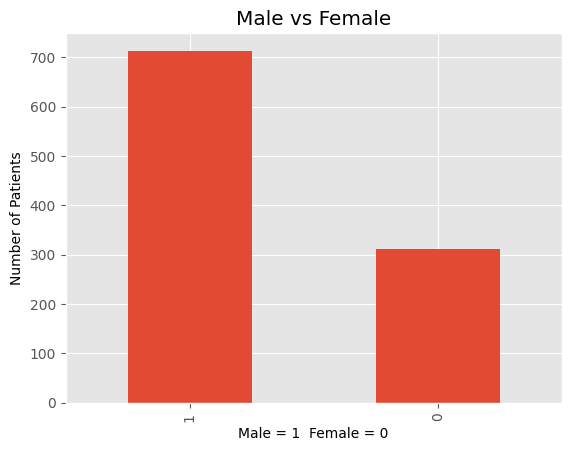

In [20]:
ax = new_heart_data['Sex'].value_counts().plot(kind='bar', title='Male vs Female')
ax.set_xlabel('Male = 1  Female = 0')
ax.set_ylabel('Number of Patients')
plt.show()

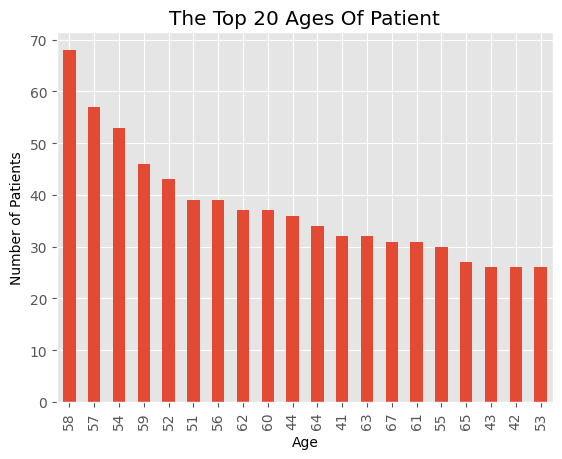

In [82]:
ax = new_heart_data['Age'].value_counts().head(20).plot(kind='bar', title="The Top 20 Ages Of Patient")
ax.set_xlabel('Age')
ax.set_ylabel('Number of Patients')
plt.show()

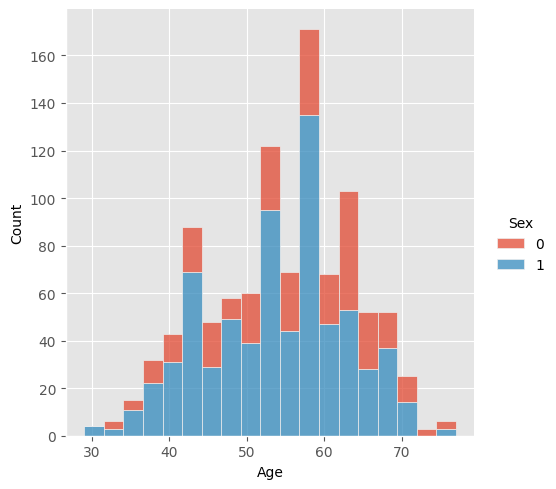

In [80]:
sns.displot(data=new_heart_data, x="Age", hue="Sex", multiple="stack")
plt.show()

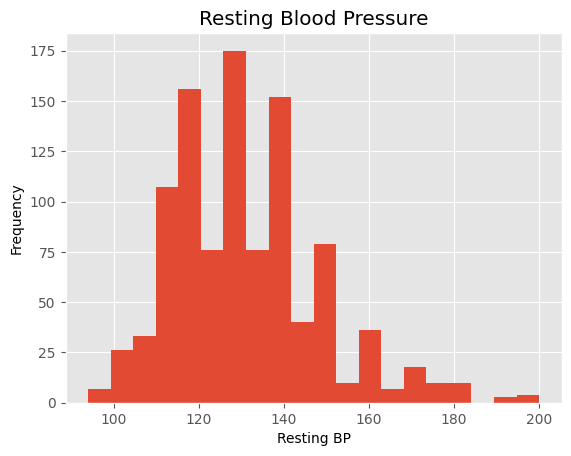

In [21]:
ax = new_heart_data['Resting_BP'].plot(kind='hist', bins=20, title='Resting Blood Pressure')
ax.set_xlabel('Resting BP')
plt.show()

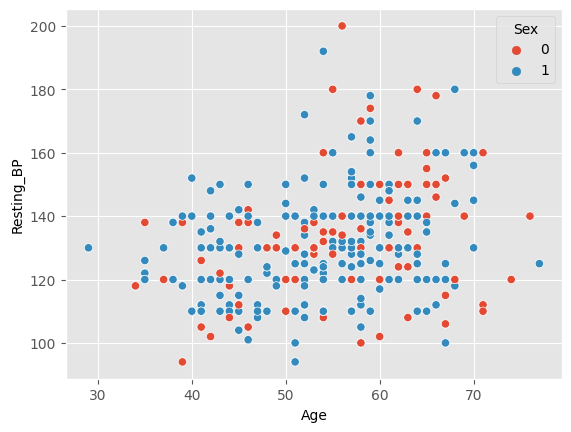

In [76]:
sns.scatterplot(x='Age', y='Resting_BP', hue='Sex', data=new_heart_data)
plt.show()

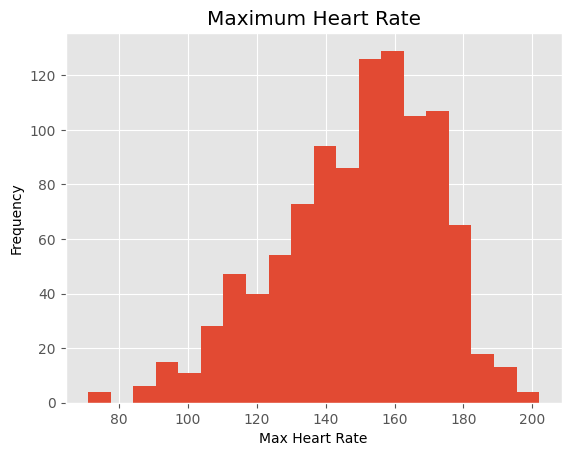

In [22]:
ax = new_heart_data['Max_Heart_Rate'].plot(kind='hist', bins=20, title='Maximum Heart Rate')
ax.set_xlabel('Max Heart Rate')
plt.show()

### Feature Relationships

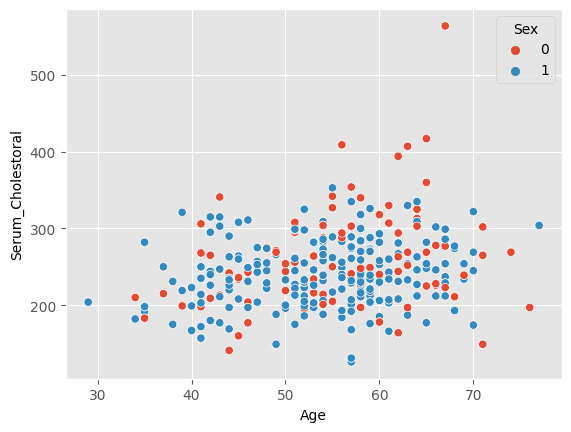

In [28]:
sns.scatterplot(x='Age', y='Serum_Cholestoral', hue='Sex', data=new_heart_data)
plt.show()

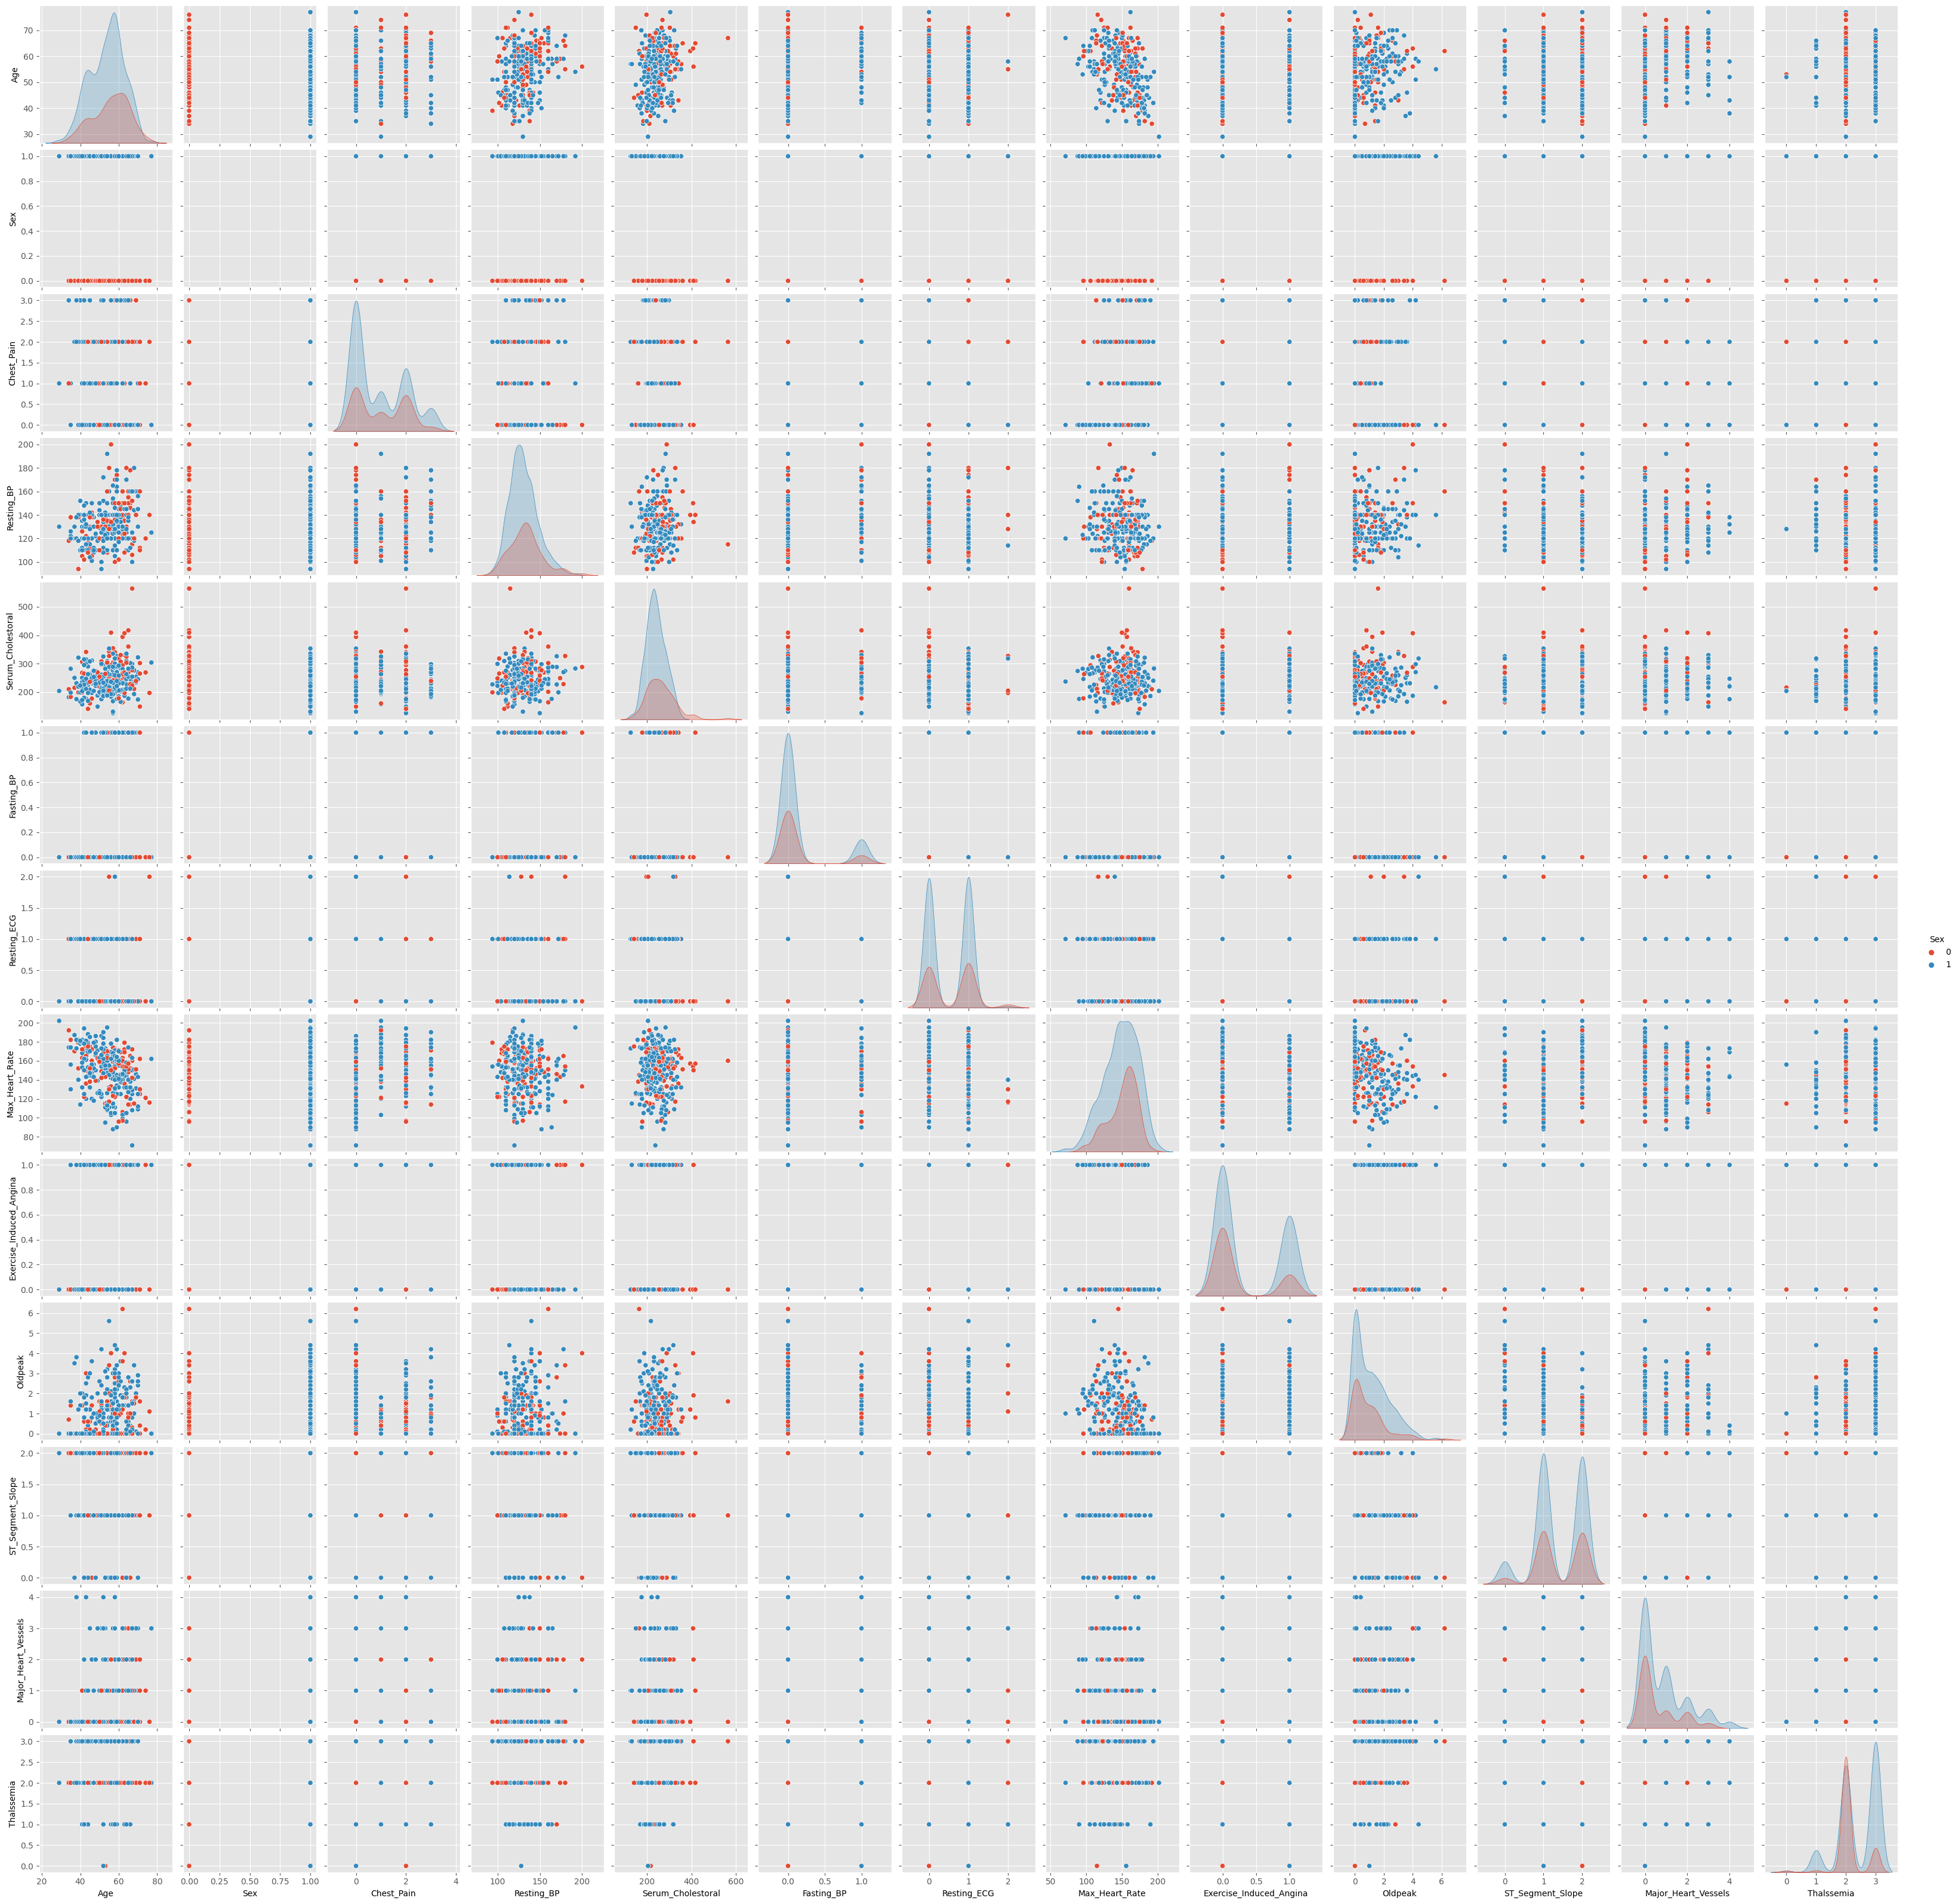

In [30]:
sns.pairplot(new_heart_data, hue='Sex', vars=['Age', 'Sex', 'Chest_Pain', 'Resting_BP', 'Serum_Cholestoral', 
                                   'Fasting_BP', 'Resting_ECG', 'Max_Heart_Rate', 'Exercise_Induced_Angina',
                                  'Oldpeak', 'ST_Segment_Slope', 'Major_Heart_Vessels', 'Thalssemia'])
plt.show()

In [32]:
df_corr = new_heart_data[['Age', 'Sex', 'Chest_Pain', 'Resting_BP', 'Serum_Cholestoral', 
                'Fasting_BP', 'Resting_ECG', 'Max_Heart_Rate', 'Exercise_Induced_Angina',
                'Oldpeak', 'ST_Segment_Slope', 'Major_Heart_Vessels', 'Thalssemia']].corr()

df_corr

,Age,Sex,Chest_Pain,Resting_BP,Serum_Cholestoral,Fasting_BP,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,ST_Segment_Slope,Major_Heart_Vessels,Thalssemia
Age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297
Sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424
Chest_Pain,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
Resting_BP,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276
Serum_Cholestoral,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244
Fasting_BP,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177
Resting_ECG,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
Max_Heart_Rate,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068
Exercise_Induced_Angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201
Oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672


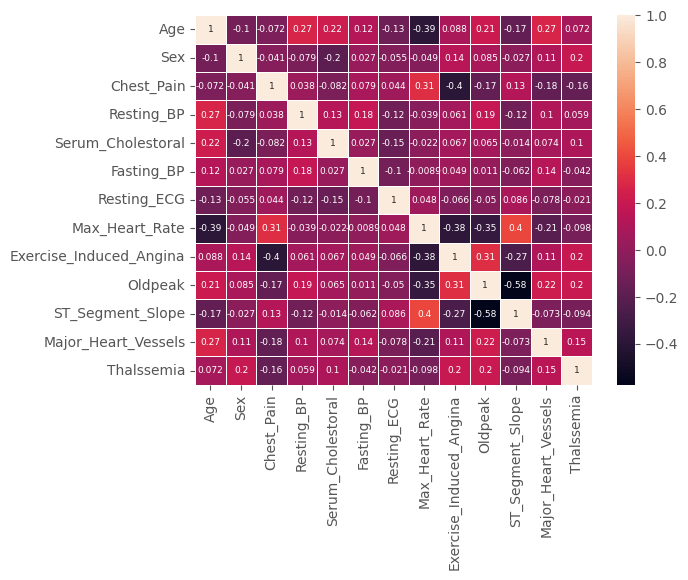

In [83]:
sns.heatmap(df_corr, annot=True, annot_kws={'size': 6.5}, linewidth=.5)
plt.show()